# Lecture Notes
## What is the difference between loss and metric
- Loss and metric are closely related but metric is the thing you care about. THe loss is what your computer is using as the performance measure to decide how to update model parameters.

## What is overfitting?
- When a model learns the training data too closely, including noise and random flucations, resulting in excellent performance on training data, but poor performance on new, unseen data.
- Caused by overly complex models, forcing memorizatio of training examples.
- Can overcome by splitting off a third validation set (test set), not used for training or metrics. Use after the whole model is complete to verify performance.

## Does using a validation set guarantee we don't overfit?
- No. Every change/run on our data

## What is "transfer learning" and why?
- Transfer learning in machine learning is a technique where knowledge gained from solving one problem is reused to improve performance on a different but related problem.
- When you use transfer learning, you can take advantage of prelearned feature.

## What is p-value?
- In machine learning, a p-value is a statistical measure used to assess the significance of an observed effect or relationship within data.
- One way to go about calculating the p-value would be by simulation. Another would be to use a mathematical formula to jump straight to this number.
- Don't trust p-value ([source](https://www.amstat.org/asa/files/pdfs/p-valuestatement.pdf))

## What do we need to call on a pathlib.Path to delete the file?
- path.unlink()


In [1]:
from fastai.vision.all import *

In [2]:
# Download and decompress pictures of dogs and cats
path = untar_data(URLs.PETS)/'images'

In [3]:
# label our iages as dogs or cats
def is_cat(x): return x[0].isupper()

In [6]:
# Create dataloader
dls = ImageDataLoaders.from_name_func('.', 
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(192)
)

In [8]:
# Train the model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.189673,0.048855,0.016915,04:13


epoch,train_loss,valid_loss,error_rate,time
0,0.081500,0.078954,0.021651,06:03
1,0.046281,0.019581,0.006089,06:06
2,0.016983,0.014487,0.005413,06:14


In [16]:
from fastdownload import download_url
from pathlib import Path
from fastai.vision.all import PILImage
import torch

# ---- image source & local path ----
url = "https://st2.depositphotos.com/1194063/6280/i/450/depositphotos_62801209-stock-photo-clown.jpg"
dest = Path("photos/portrait.jpg")
dest.parent.mkdir(parents=True, exist_ok=True)
download_url(url, dest, show_progress=False)

# ---- load image ----
img = PILImage.create(dest)

# ---- predict (robust to 3- or 4-tuple return) ----
res = learn.predict(img)
try:
    pred_label, pred_idx, probs = res
except ValueError:
    pred_label, pred_idx, probs, *_ = res

# ensure we can index with an int
pred_idx = int(pred_idx.item() if isinstance(pred_idx, torch.Tensor) else pred_idx)

# ---- vocab & friendly names ----
vocab = list(map(str, learn.dls.vocab))            # e.g. ['False','True']
name_map = {'False': 'not_clown', 'True': 'clown'} # adjust if your labels differ

# probability of the predicted class
pred_prob = float(probs[pred_idx])

# pretty name for predicted label
pred_name = name_map.get(str(pred_label), str(pred_label))

print(f"Prediction: {pred_name} with probability {pred_prob:.4f}")

# ---- print per-class probabilities ----
print("Class probabilities:")
for i, p in enumerate(probs):
    cls_raw = vocab[i] if i < len(vocab) else f"class_{i}"
    cls_name = name_map.get(cls_raw, cls_raw)
    print(f"  {cls_name:>10}: {float(p):.4f}")

# ---- convenience: boolean + P(clown) ----
if 'True' in vocab:
    p_clown = float(probs[vocab.index('True')])
    is_clown = (str(pred_label) == 'True')
    print(f"\nis_clown={is_clown}  p(is_clown)={p_clown:.4f}")

Prediction: clown with probability 0.5692
Class probabilities:
   not_clown: 0.4308
       clown: 0.5692

is_clown=True  p(is_clown)=0.5692


In [ ]:
from fastdownload import download_url
from pathlib import Path
from fastai.vision.all import PILImage
import torch

# ---- image source & local path ----
url = "https://static7.depositphotos.com/1155356/680/i/600/depositphotos_6802331-stock-photo-clown-makes-funny-face.jpg"
dest = Path("photos/portrait.jpg")
dest.parent.mkdir(parents=True, exist_ok=True)
download_url(url, dest, show_progress=False)

# ---- load image ----
img = PILImage.create(dest)

# ---- predict (robust to 3- or 4-tuple return) ----
res = learn.predict(img)
try:
    pred_label, pred_idx, probs = res
except ValueError:
    pred_label, pred_idx, probs, *_ = res

# ensure we can index with an int
pred_idx = int(pred_idx.item() if isinstance(pred_idx, torch.Tensor) else pred_idx)

# ---- vocab & friendly names ----
vocab = list(map(str, learn.dls.vocab))            # e.g. ['False','True']
name_map = {'False': 'not_clown', 'True': 'bird'} # adjust if your labels differ

# probability of the predicted class
pred_prob = float(probs[pred_idx])

# pretty name for predicted label
pred_name = name_map.get(str(pred_label), str(pred_label))

print(f"Prediction: {pred_name} with probability {pred_prob:.4f}")

# ---- print per-class probabilities ----
print("Class probabilities:")
for i, p in enumerate(probs):
    cls_raw = vocab[i] if i < len(vocab) else f"class_{i}"
    cls_name = name_map.get(cls_raw, cls_raw)
    print(f"  {cls_name:>10}: {float(p):.4f}")

# ---- convenience: boolean + P(clown) ----
if 'True' in vocab:
    p_clown = float(probs[vocab.index('True')])
    is_clown = (str(pred_label) == 'True')
    print(f"\nis_clown={is_clown}  p(is_clown)={p_clown:.4f}")

Prediction: not_clown with probability 0.9276
Class probabilities:
   not_clown: 0.9276
       clown: 0.0724

is_clown=False  p(is_clown)=0.0724


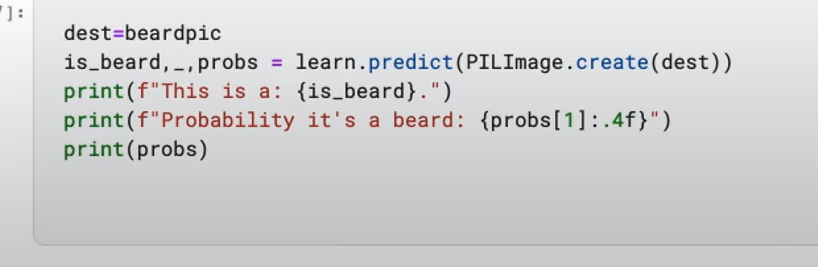